In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
df = pd.read_csv("netflix_movies_detailed_up_to_2025.csv")
print(df.shape)
print(df.columns)
df.head()

(16000, 18)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'language',
       'description', 'popularity', 'vote_count', 'vote_average', 'budget',
       'revenue'],
      dtype='object')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [3]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert 'date_added' to datetime if present
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['year_added'] = df['date_added'].dt.year
    df['month_added'] = df['date_added'].dt.month_name()


In [5]:
# Fill missing values
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['director'] = df['director'].fillna('Not Available')

# Extract main genre
if 'listed_in' in df.columns:
    df['main_genre'] = df['listed_in'].str.split(',').str[0].str.strip()


    

In [6]:


# Add decade column
if 'release_year' in df.columns:
    df['decade'] = (df['release_year'] // 10 * 10).astype(str) + 's'

In [7]:
df.drop(columns='duration', inplace=True)

In [8]:
# Replace whitespace-only strings with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Identify rows where all or most columns are blank
blank_rows = df.isna().all(axis=1) | (df.astype(str).apply(lambda x: x.str.strip() == '').all(axis=1))

# Get the index of those rows and their following row (partner)
indices_to_remove = blank_rows[blank_rows].index.tolist()
partner_indices = [i + 1 for i in indices_to_remove if i + 1 < len(df)]

# Combine and drop those rows
rows_to_drop = set(indices_to_remove + partner_indices)
df.drop(index=rows_to_drop, inplace=True)

# Reset index (optional but cleaner)
df.reset_index(drop=True, inplace=True)










In [9]:
# Define the condition: rows with unwanted placeholder values
condition = (
    (df['country'].astype(str).str.strip().str.lower() == 'unknown') |
    (df['rating'].astype(str).str.strip().str.lower() == 'not rated') |
    (df['director'].astype(str).str.strip().str.lower() == 'not available')
)


In [10]:


# Get indices of those rows
indices_to_remove = condition[condition].index.tolist()

# Also add their next row (if exists)
partner_indices = [i + 1 for i in indices_to_remove if i + 1 < len(df)]

# Combine and remove
rows_to_drop = set(indices_to_remove + partner_indices)
df.drop(index=rows_to_drop, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,genres,language,description,popularity,vote_count,vote_average,budget,revenue,year_added,month_added,decade
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867,2010,May,2010s
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630,2010,July,2010s
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868,2010,November,2010s
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732,2010,November,2010s
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471,2010,March,2010s


In [12]:
# Save cleaned data


df.to_csv("netflix_data.csv", index=False, encoding='utf-8-sig', quoting=csv.QUOTE_ALL)




In [13]:
# Load the cleaned dataset
df2 = pd.read_csv("netflix_data.csv")

# Setup
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [14]:
print(df2.shape)
print(df2.dtypes)
print(df2.isnull().sum())

df2.describe(include='all')


(14964, 20)
show_id           int64
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating          float64
genres           object
language         object
description      object
popularity      float64
vote_count        int64
vote_average    float64
budget            int64
revenue           int64
year_added        int64
month_added      object
decade           object
dtype: object
show_id           0
type              0
title             0
director          0
cast            102
country           0
date_added        0
release_year      0
rating            0
genres           27
language          0
description      67
popularity        0
vote_count        0
vote_average      0
budget            0
revenue           0
year_added        0
month_added       0
decade            0
dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,rating,genres,language,description,popularity,vote_count,vote_average,budget,revenue,year_added,month_added,decade
count,1.496400e+04,14964,14964,14964,14862,14964,14964,14964.000000,14964.000000,14937,14964,14897,14964.000000,14964.000000,14964.000000,1.496400e+04,1.496400e+04,14964.000000,14964,14964
unique,NaN,1,14489,8934,14719,1435,4316,NaN,NaN,2690,71,14892,NaN,NaN,NaN,NaN,NaN,NaN,12,2
top,NaN,Movie,Eden,Tyler Perry,"Wasabi Mizuta, Megumi Oohara, Yumi Kakazu, Sub...",United States of America,2025-03-07,NaN,NaN,Drama,en,"Marta may be an orphan, and she may be affecte...",NaN,NaN,NaN,NaN,NaN,NaN,October,2010s
freq,NaN,14964,6,19,10,5226,60,NaN,NaN,1254,8923,2,NaN,NaN,NaN,NaN,NaN,NaN,1699,9611
mean,5.023969e+05,NaN,NaN,NaN,NaN,NaN,NaN,2017.292302,6.083098,NaN,NaN,NaN,20.870464,758.945402,6.083098,9.226905e+06,2.597552e+07,2017.292302,NaN,NaN
std,3.607759e+05,NaN,NaN,NaN,NaN,NaN,NaN,4.528017,1.528235,NaN,NaN,NaN,70.795208,2140.697192,1.528235,2.974446e+07,1.151637e+08,4.528017,NaN,NaN
min,1.890000e+02,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,0.000000,NaN,NaN,NaN,3.860000,0.000000,0.000000,0.000000e+00,0.000000e+00,2010.000000,NaN,NaN
25%,2.105525e+05,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,5.677000,NaN,NaN,NaN,7.944000,62.000000,5.677000,0.000000e+00,0.000000e+00,2013.000000,NaN,NaN
50%,4.315510e+05,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,6.300000,NaN,NaN,NaN,11.060000,151.000000,6.300000,0.000000e+00,0.000000e+00,2017.000000,NaN,NaN
75%,7.334192e+05,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,6.971000,NaN,NaN,NaN,17.681500,454.250000,6.971000,3.000000e+06,2.248851e+06,2021.000000,NaN,NaN


In [15]:
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,genres,language,description,popularity,vote_count,vote_average,budget,revenue,year_added,month_added,decade
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867,2010,May,2010s
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630,2010,July,2010s
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868,2010,November,2010s
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732,2010,November,2010s
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471,2010,March,2010s


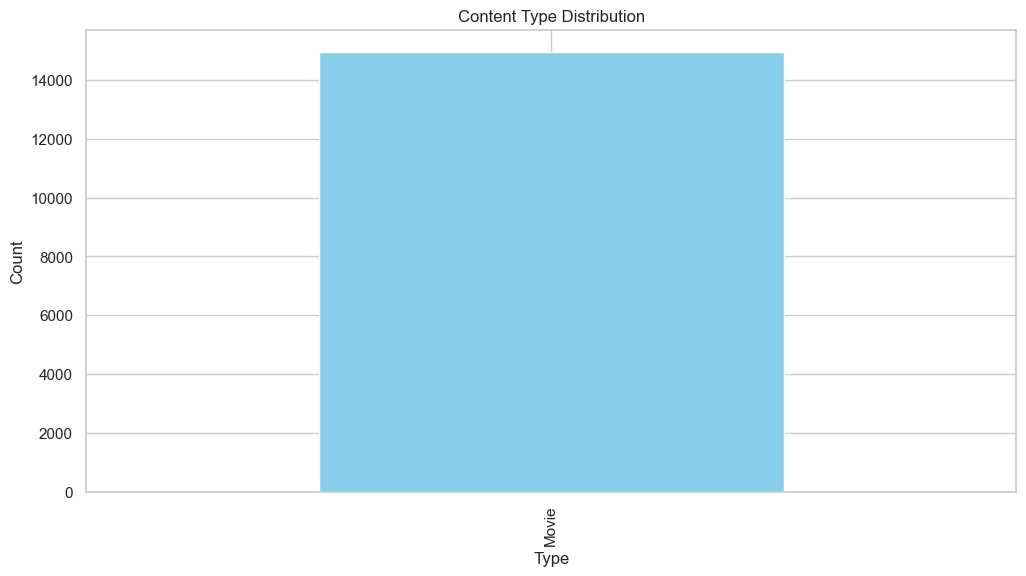

In [16]:
# Movie Type Distribution (Movie vs TV Show)

df2['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


C:\Users\mrsid\AppData\Local\Temp\ipykernel_16640\1178886473.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')


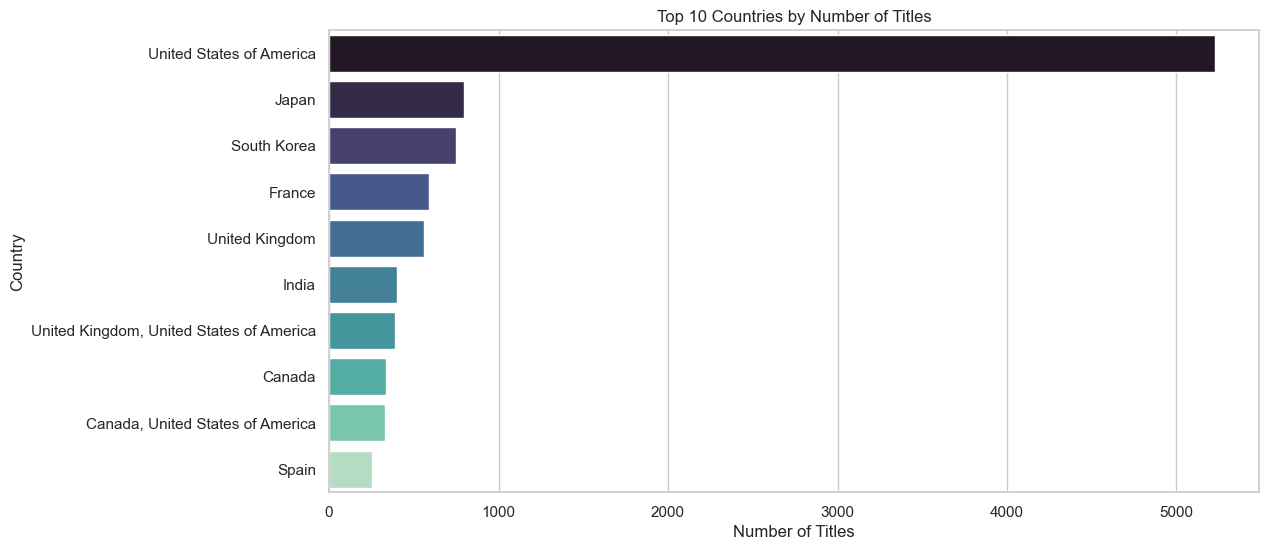

In [17]:
#Top 10 Countries with Most Content

top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

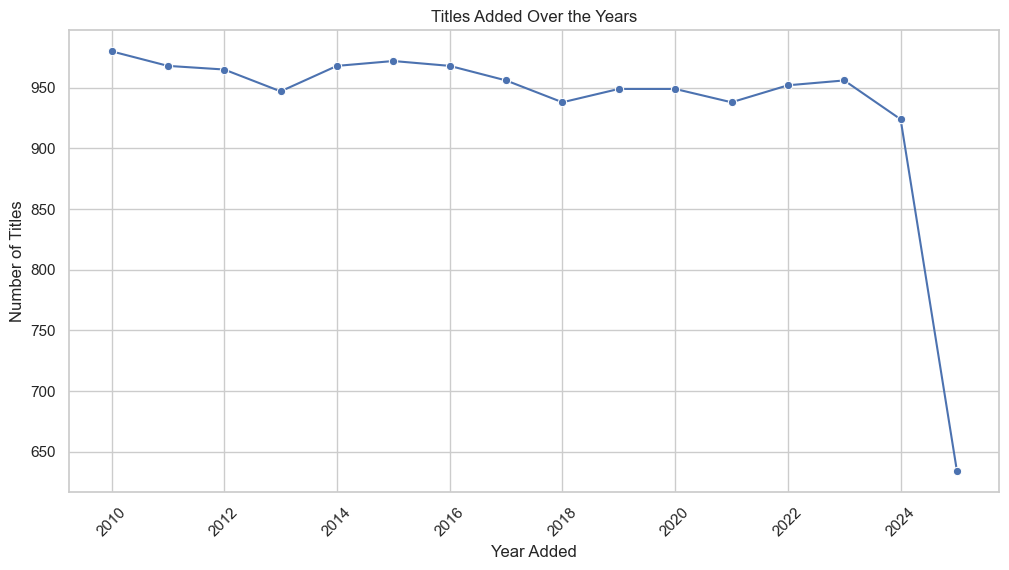

In [18]:
# Titles Added Over Time
titles_by_year = df2['year_added'].value_counts().sort_index()

sns.lineplot(x=titles_by_year.index, y=titles_by_year.values, marker='o')
plt.title('Titles Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


C:\Users\mrsid\AppData\Local\Temp\ipykernel_16640\369952696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='mako')


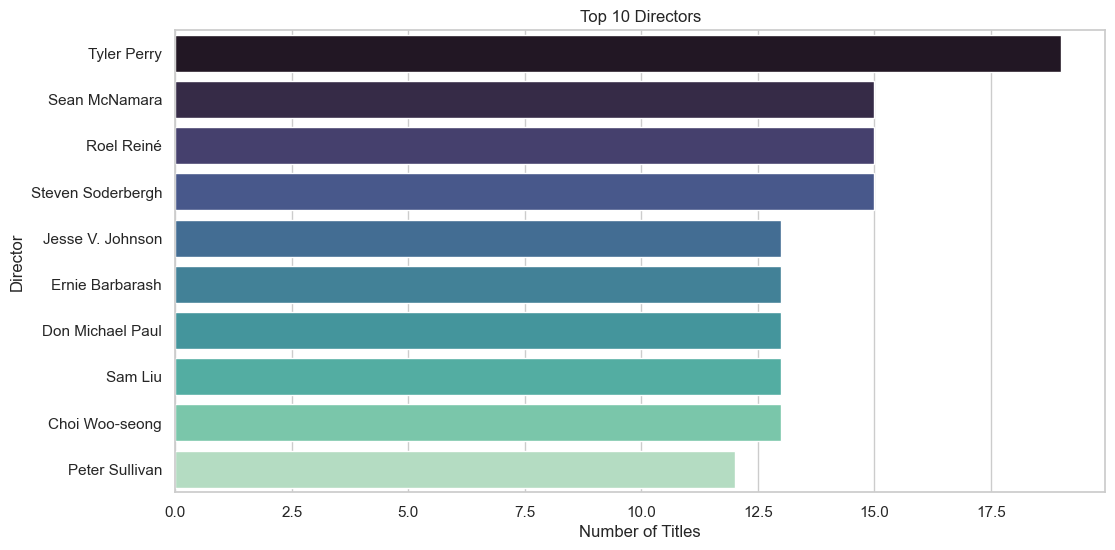

In [19]:
# top 10 directors with most titles
top_directors = df2['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='mako')
plt.title('Top 10 Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()



C:\Users\mrsid\AppData\Local\Temp\ipykernel_16640\3825554570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=rating_counts.index, x=rating_counts.values, palette='coolwarm')


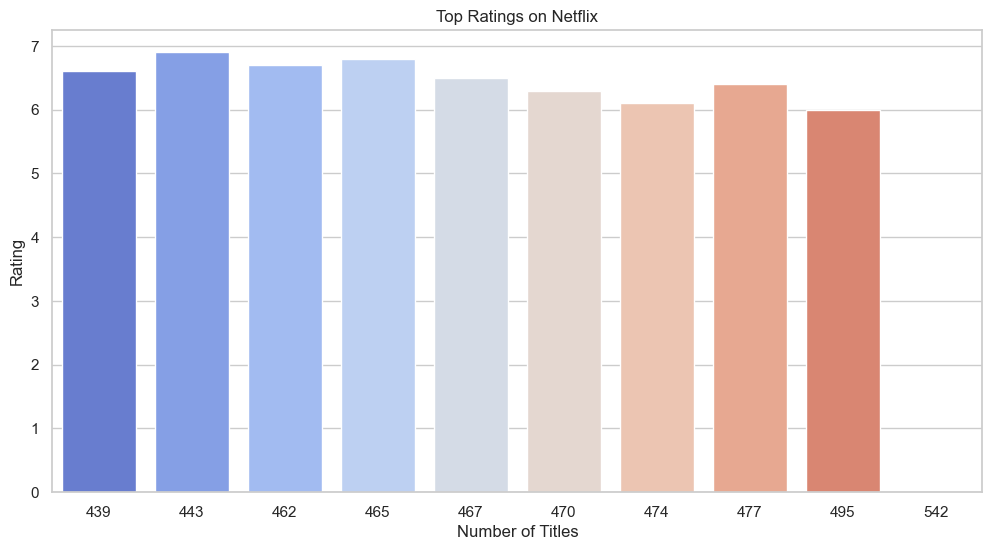

In [20]:
#rating distribution
rating_counts = df2['rating'].value_counts().head(10)

sns.barplot(y=rating_counts.index, x=rating_counts.values, palette='coolwarm')
plt.title('Top Ratings on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.show()
